# Arga Bagus Priambodo (AIA)

# Load Data

In [120]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Mengecek dan Visualisasi Data

Menggunakan data train 6000 dan data testing 10000

Training data shape :  (6000, 28, 28) (6000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total output :  10
Output class :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Label : 7')

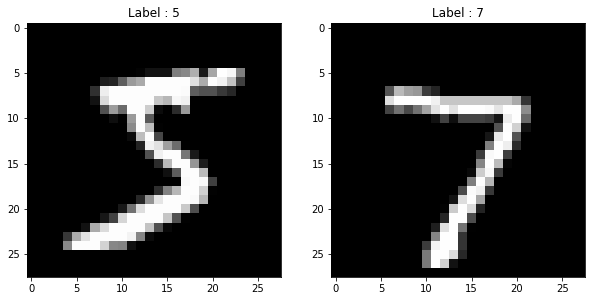

In [121]:
train_images = train_images[:6000]
train_labels = train_labels[:6000]

print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total output : ', nClasses)
print('Output class : ', classes)
 
plt.figure(figsize=[10,5])
 
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Label : {}".format(train_labels[0]))
 
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Label : {}".format(test_labels[0]))

# Konversi gambar matrik (28x28) menjadi array (28x28=784 dimensi)

In [122]:
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Normalisasi Data

In [123]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
train_data /= 255
test_data /= 255

# Merubah Label menjadi Kategorial

In [124]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
print('Label 0 : ', train_labels[0])
print('Setelah dirubah ', train_labels_one_hot[0])

Label 0 :  5
Setelah dirubah  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Membuat Neural Network(NN) dengan Keras

In [125]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# Konfigurasi NN

In [126]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model

In [127]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 6000 samples, validate on 10000 samples
Epoch 1/20
6000/6000 [==============================] - 19s 3ms/step - loss: 0.8015 - acc: 0.7560 - val_loss: 0.4118 - val_acc: 0.8765
Epoch 2/20
6000/6000 [==============================] - 4s 661us/step - loss: 0.3025 - acc: 0.9117 - val_loss: 0.2623 - val_acc: 0.9208
Epoch 3/20
6000/6000 [==============================] - 5s 795us/step - loss: 0.2128 - acc: 0.9383 - val_loss: 0.2768 - val_acc: 0.9159
Epoch 4/20
6000/6000 [==============================] - 5s 762us/step - loss: 0.1647 - acc: 0.9487 - val_loss: 0.2363 - val_acc: 0.9247
Epoch 5/20
6000/6000 [==============================] - 4s 736us/step - loss: 0.1132 - acc: 0.9658 - val_loss: 0.2089 - val_acc: 0.9350
Epoch 6/20
6000/6000 [==============================] - 5s 820us/step - loss: 0.0867 - acc: 0.9750 - val_loss: 0.2227 - val_acc: 0.9314
Epoch 7/20
6000/6000 [==============================] - 5s 827us/step - loss: 0.0631 - acc: 0.9818 - val_loss: 0.2538 - val_acc: 0.9278


# Mengecek Performa Model

In [128]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 4s 382us/step
Test Data : Loss = 0.22584733026808826, accuracy = 0.9522


# Mengecek Overvitting

Text(0.5,1,'Accuracy Curves')

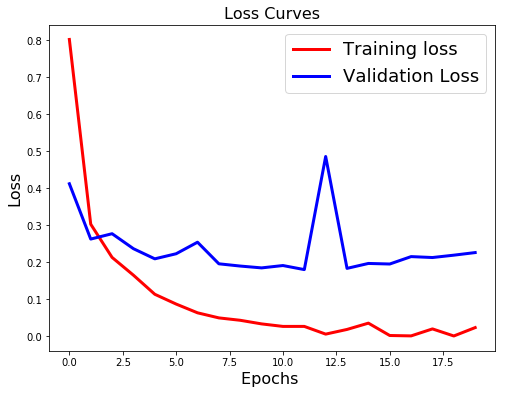

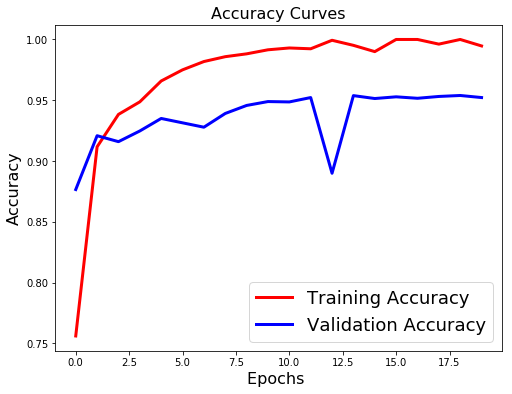

In [129]:
#Plot Loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot Accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Menambahkan Regulasi ke Model

In [130]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.6))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.4))
model_reg.add(Dense(nClasses, activation='softmax'))

# Mengecek Performa setelah Regulasi

Train on 6000 samples, validate on 10000 samples
Epoch 1/20
6000/6000 [==============================] - 8s 1ms/step - loss: 1.0383 - acc: 0.6702 - val_loss: 0.4438 - val_acc: 0.8695
Epoch 2/20
6000/6000 [==============================] - 5s 823us/step - loss: 0.4580 - acc: 0.8607 - val_loss: 0.3153 - val_acc: 0.9047
Epoch 3/20
6000/6000 [==============================] - 5s 824us/step - loss: 0.3460 - acc: 0.8948 - val_loss: 0.2704 - val_acc: 0.9192
Epoch 4/20
6000/6000 [==============================] - 5s 781us/step - loss: 0.2959 - acc: 0.9062 - val_loss: 0.2429 - val_acc: 0.9264
Epoch 5/20
6000/6000 [==============================] - 5s 840us/step - loss: 0.2382 - acc: 0.9275 - val_loss: 0.2130 - val_acc: 0.9350
Epoch 6/20
6000/6000 [==============================] - 5s 784us/step - loss: 0.2013 - acc: 0.9380 - val_loss: 0.2110 - val_acc: 0.9344
Epoch 7/20
6000/6000 [==============================] - 5s 799us/step - loss: 0.1800 - acc: 0.9438 - val_loss: 0.2531 - val_acc: 0.9244
E

Text(0.5,1,'Accuracy Curves')

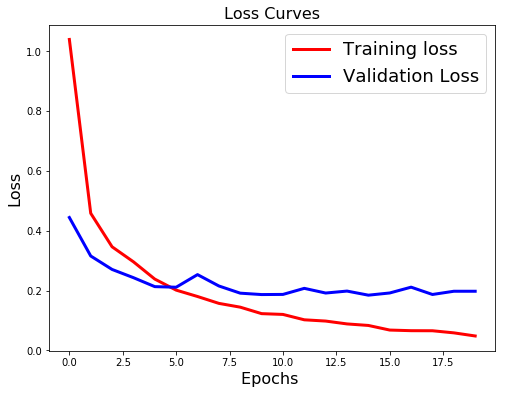

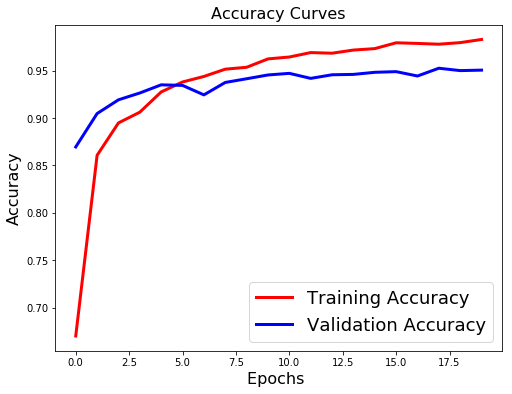

In [131]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Mengecek Kembali Performa Model

In [132]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)
print("Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 5s 452us/step
Test Data : Loss = 0.1975805066713714, accuracy = 0.9505


# Visualisasi Prediksi

In [137]:
test_images.shape

(10000, 28, 28)

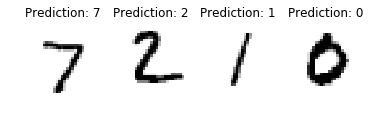

In [118]:
images_and_predictions = list(zip(test_images, model_reg.predict_classes(test_data)))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()